### Курс "Визуализация данных"
##### Группа 6231-010402D Магистр Чаплыгин А.О.
#### Лабораторная работа 1 - Представление данных на графиках.

Используемый в работе набор данных доступен по следующей ссылке: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database и описывает рейтинг аниме. В наборе данных содержится таблица с 7 столбцами.

<table border="1">
    <caption>Anime Recommendations Database</caption>
    <tr><th>Номер столбца</th><th>Название столбца</th><th>Описание столбца</th></tr>
    <tr><td>1</td><td>anime_id</td><td>Идентификатор</td></tr>
    <tr><td>2</td><td>name</td><td>Наименование</td></tr>
    <tr><td>3</td><td>genre</td><td>Жанр</td></tr>
    <tr><td>4</td><td>type</td><td>Тип</td></tr>
    <tr><td>5</td><td>episodes</td><td>Количество эпизодов</td></tr>
    <tr><td>6</td><td>rating</td><td>Рейтинг</td></tr>
    <tr><td>7</td><td>members</td><td>Количество оценивших</td></tr>
</table>

In [204]:
#INIT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
#kaggle datasets download -d CooperUnion/anime-recommendations-database

In [206]:
df = pd.read_csv('anime.csv', sep=',')
#df.head(10)
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [207]:
df_good_dv = df.copy()
df_good_dv = df_good_dv.drop(columns = ['anime_id', 'genre', 'type'], axis = 1)
df_good_dv.head(10)

,name,episodes,rating,members
0,Kimi no Na wa.,1,9.37,200630
1,Fullmetal Alchemist: Brotherhood,64,9.26,793665
2,Gintama°,51,9.25,114262
3,Steins;Gate,24,9.17,673572
4,Gintama&#039;,51,9.16,151266
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,10,9.15,93351
6,Hunter x Hunter (2011),148,9.13,425855
7,Ginga Eiyuu Densetsu,110,9.11,80679
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,1,9.10,72534
9,Gintama&#039;: Enchousen,13,9.11,81109


##### 1. "Хорошее" представление

Наглядное представление зависимости рейтинга, количества эпизодов и оценивших зрителей

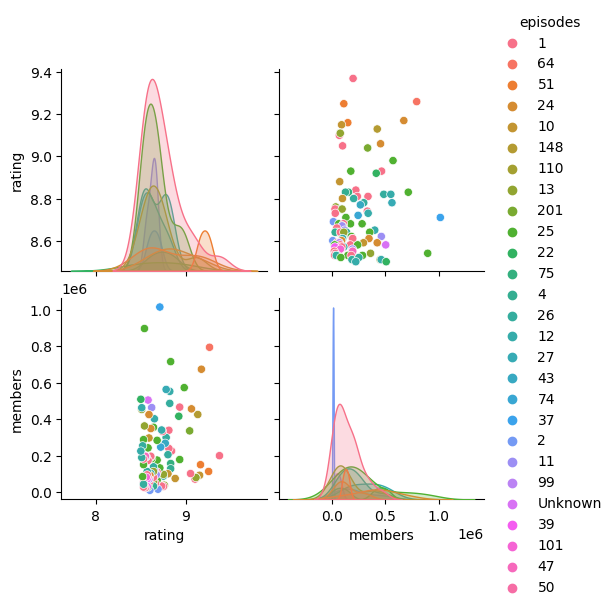

In [208]:
sns.pairplot(df_good_dv.head(100), hue = 'episodes')

In [209]:
df_with_episodes = df_good_dv.copy()
df_with_episodes.dropna(axis=0)
#df_with_episodes = df.copy()
df_with_episodes = df_with_episodes.drop(df_with_episodes[df_with_episodes.episodes == 'Unknown'].index)
df_with_episodes

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


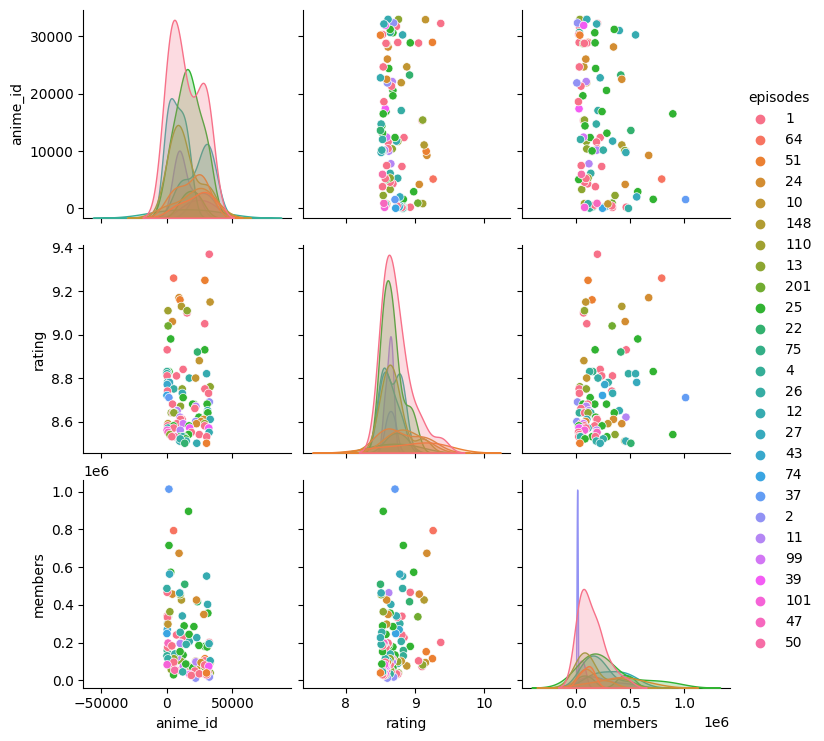

In [210]:
sns.pairplot(df_with_episodes.head(100), hue = 'episodes')

<AxesSubplot: ylabel='episodes'>

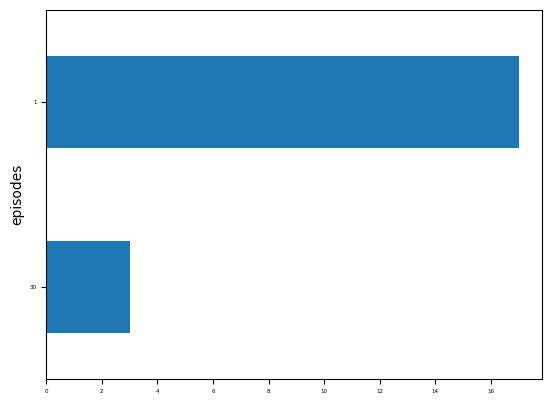

In [211]:
bar = df_with_episodes[df_with_episodes['members'] < 15].groupby('episodes')['rating'].sum().sort_values()
bar.plot(kind = 'barh', fontsize = 4)

In [212]:
df_nn = df_with_episodes.copy()
df_nn = df_nn.dropna(axis=0)

df_m = df_nn[df_nn['members'] < 15]
df_m

,anime_id,name,genre,type,episodes,rating,members
10444,34490,Sushi Azarashi,Comedy,TV,30,3.0,12
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.0,13


In [213]:
#ring2 = df[df['Rings'] > 25].sort_values('Rings')
#ring2.plot(x = 'Rings', y = ['Diameter', 'Length', 'Height'], kind = 'bar')